<h1>PROJECT 3: DENGUE DATA ANALYSIS</h1>

<h2>ALABADO, RODERICK L.</h2>
<h3>BSIT-3A</h3>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue['Year'] = dengue['Year'].astype('int')

In [8]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

<Figure size 1200x800 with 0 Axes>

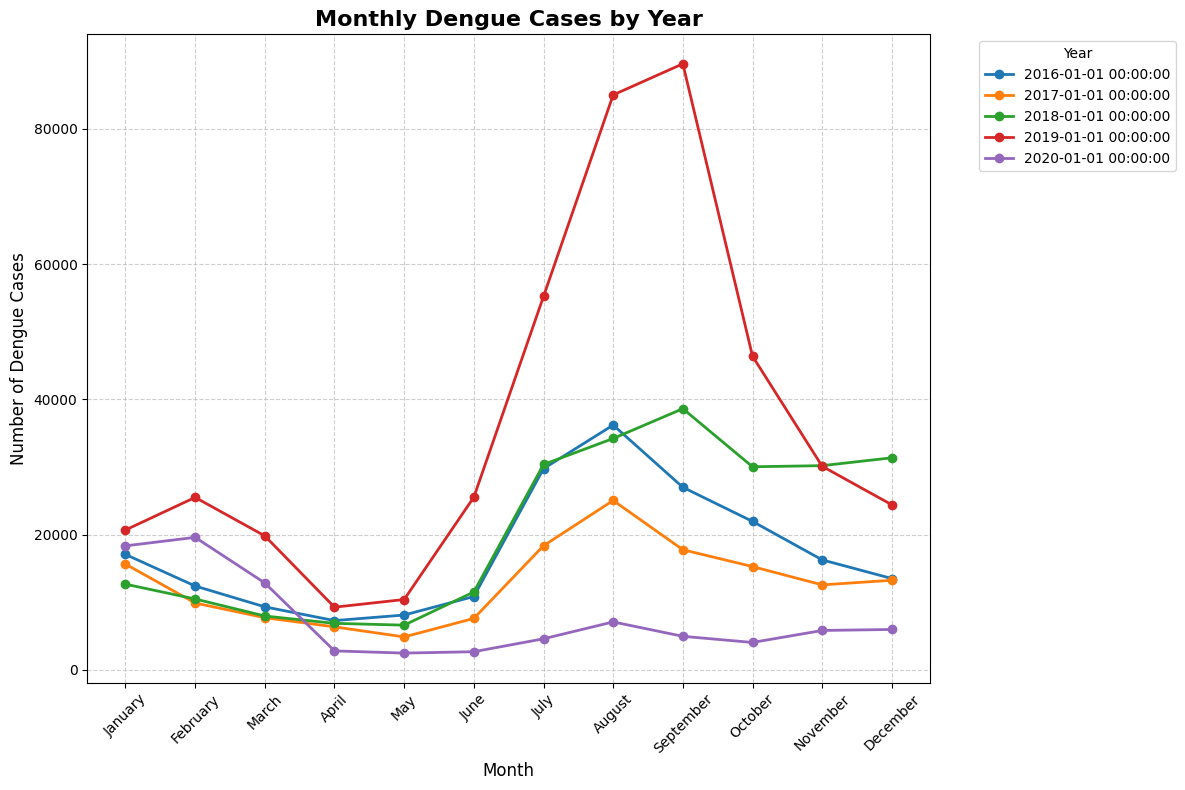

In [30]:

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]


dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)


monthly_cases = dengue.groupby(['Month', 'Year'])['Dengue_Cases'].sum()


plt.figure(figsize=(12, 8))
monthly_cases.unstack().plot(kind='line', marker='o', linewidth=2, figsize=(12, 8))


plt.title('Monthly Dengue Cases by Year', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Dengue Cases', fontsize=12)


plt.xticks(range(0, 12), month_order, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

plt.show()


<h2>Insight 1</h2>
<p>1. Dengue cases in 2019 were significantly higher than in other years, with a sharp spike between July and September.This indicates that 2019 experienced a major outbreak, likely due to favorable conditions for mosquito breeding </p>

<h2>Insight 2</h2>
<p>2. Across all years, cases tend to increase around mid-year (June–September) and decline towards December–April. This pattern suggests a strong link between dengue incidence and the rainy season, when mosquito populations typically rise. </p>

<h1> LINE PLOT WITH SEABORN </h1>

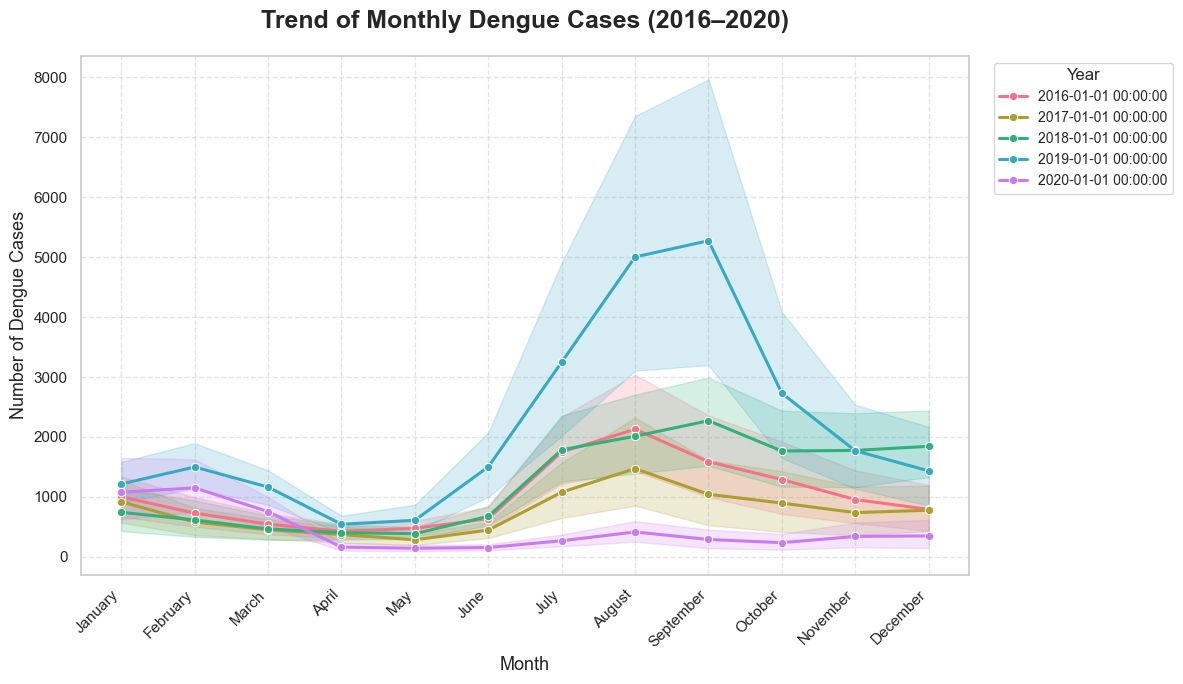

In [32]:

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure month column is ordered
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Set Seaborn style and color palette
sns.set_theme(style='whitegrid')
palette = sns.color_palette('husl', n_colors=dengue['Year'].nunique())

# Create the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=dengue,
    x='Month',
    y='Dengue_Cases',
    hue='Year',
    marker='o',
    linewidth=2.2,
    palette=palette
)

# Add title and labels
plt.title('Trend of Monthly Dengue Cases (2016–2020)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of Dengue Cases', fontsize=13)

# Customize ticks and layout
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust legend
plt.legend(
    title='Year',
    title_fontsize=12,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)

# Refine layout
plt.tight_layout()
plt.show()


<h3> Insight 3 </h3>
<p>The year 2019 recorded the most significant rise in dengue cases, peaking around August to September.This sharp increase suggests that 2019 experienced a major dengue outbreak, possibly driven by favorable breeding conditions or reduced preventive measures that year. </p>

<h3> Insight 4 </h3>
<p>Across all years (2016–2020), dengue cases consistently increase during the middle months (June to September) and drop during December to April. This seasonal trend indicates that dengue transmission is strongly influenced by the rainy season, highlighting the need for intensified mosquito control efforts before mid-year. </p>

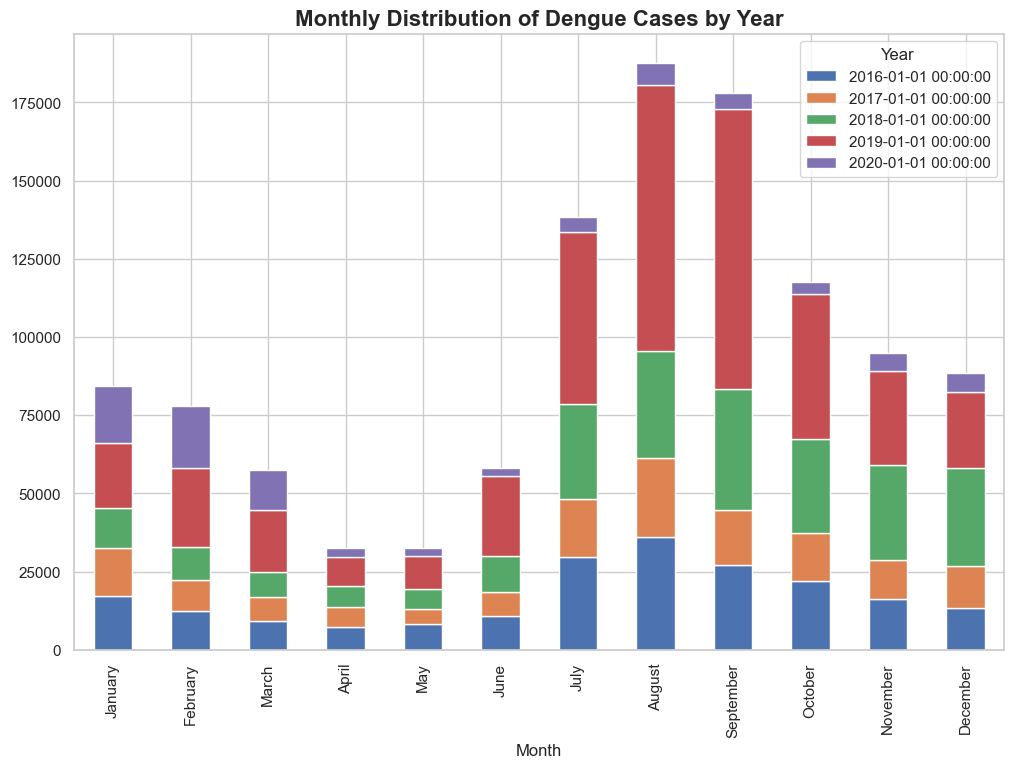

In [34]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12, 8)
plt.title('Monthly Distribution of Dengue Cases by Year', fontsize=16, fontweight='bold')
plt.show()

<h3> Insight 5 </h3>
<p>The chart shows a pronounced spike in dengue cases from July to September, where total cases across all years reach their highest levels. This pattern reflects the rainy season effect, during which stagnant water increases mosquito breeding, leading to higher dengue transmission rates. </p>

<h3> Insight 6 </h3>
<p>The red bars representing 2019 are the largest across nearly all months, particularly in August and September, showing that 2019 had the most severe dengue outbreak among the five years. This suggests that factors in 2019 (such as heavier rainfall, delayed interventions, or viral strain variation) contributed to the dramatic increase in cases. </p>

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

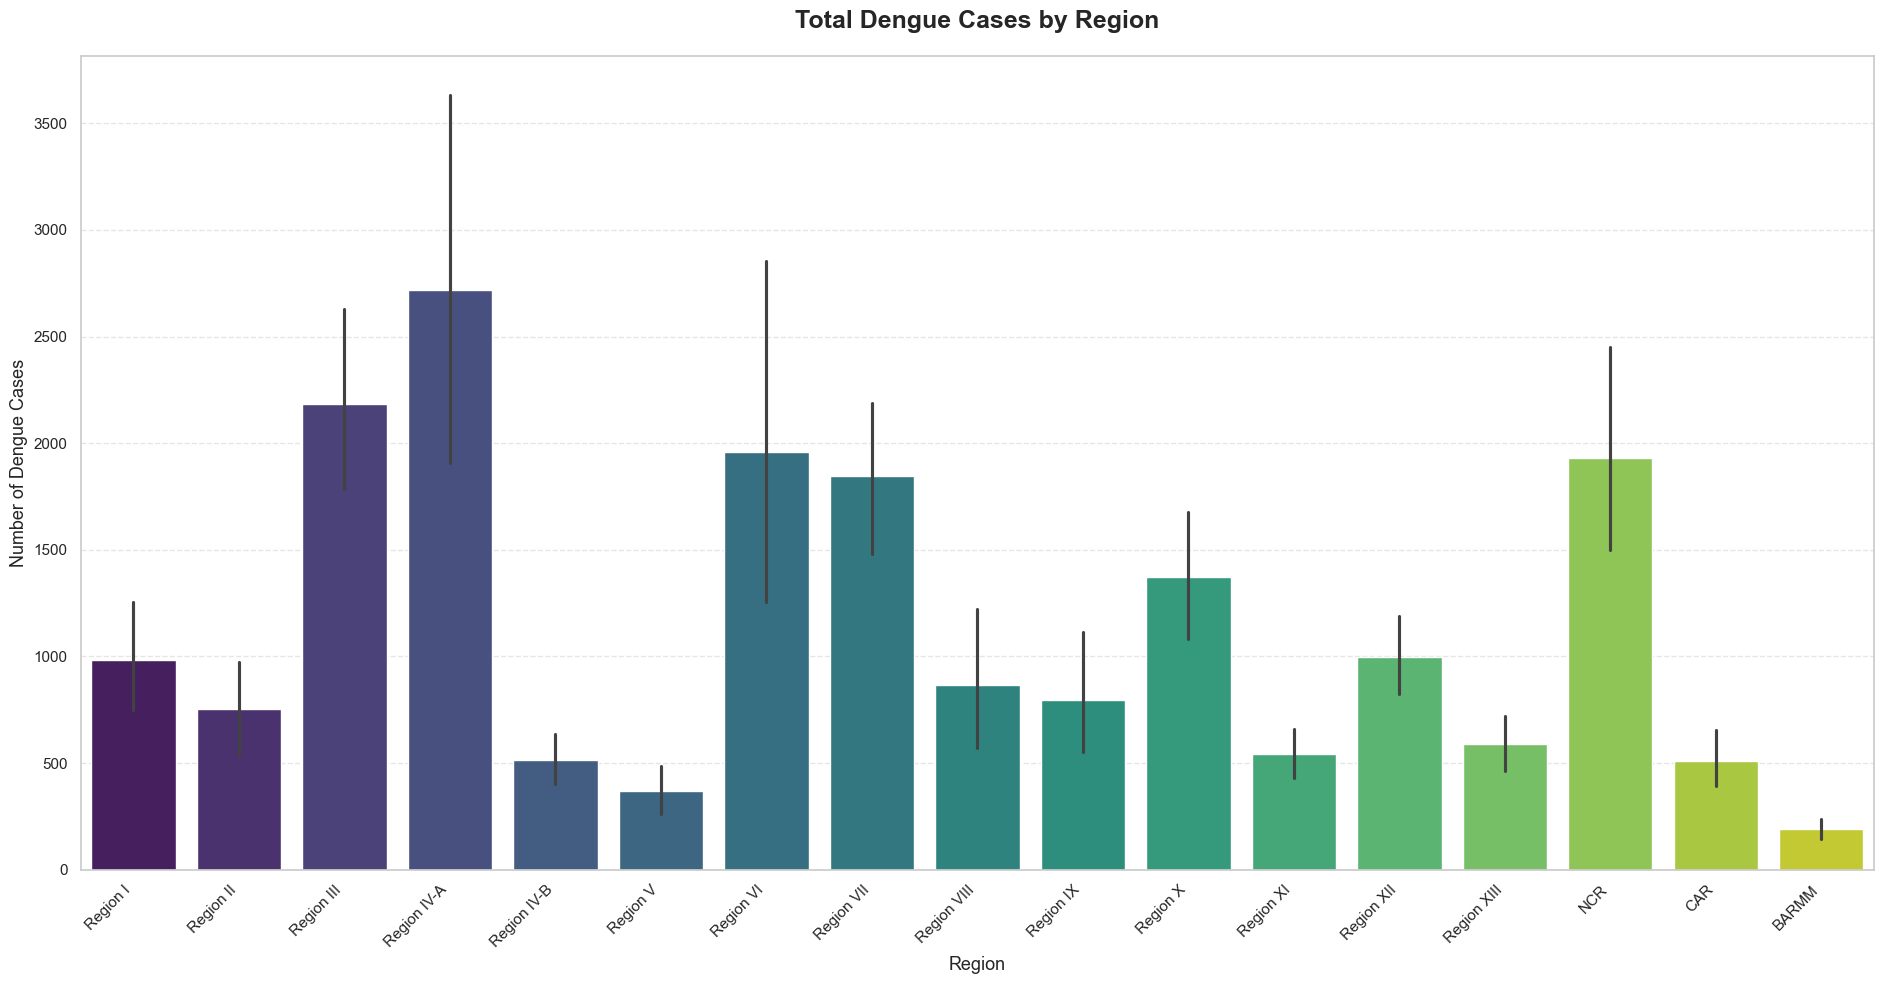

In [35]:
# Bar plot of Dengue Cases by Region
visual1 = sns.barplot(data=dengue, x='Region', y='Dengue_Cases', palette='viridis')

# Figure size
plt.gcf().set_size_inches(19, 10)

# Add title and axis labels
plt.title('Total Dengue Cases by Region', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=13)
plt.ylabel('Number of Dengue Cases', fontsize=13)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


<h3> Insight 7 </h3>
<p>Among all regions, Region IV-A reported the highest number of dengue cases, followed by Region III and NCR (National Capital Region).
This may be due to high population density and urbanization, which often create ideal mosquito breeding environments and increase human exposure. </p>

<h3> Insight 8 </h3>
<p>BARMM (Bangsamoro Autonomous Region in Muslim Mindanao) and CAR (Cordillera Administrative Region) had the lowest case counts, indicating relatively fewer outbreaks. Possible reasons include lower population density, geographic elevation, or more effective vector control programs in those areas. </p>

<h1> Mortality Rate per each Region </h1>

In [14]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [15]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


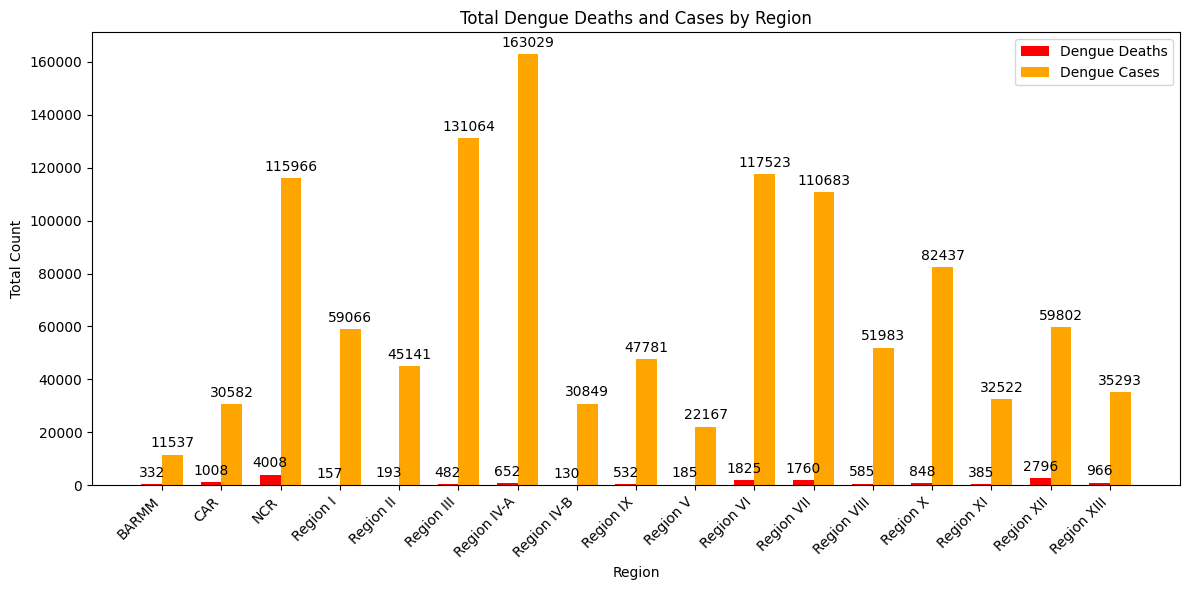

In [16]:

# Assuming Regional_Death is already created
regions = Regional_Death['Region']
deaths = Regional_Death['Dengue_Deaths']
cases = Regional_Death['Dengue_Cases']

# Set up bar positions
x = np.arange(len(regions))
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, deaths, width, label='Dengue Deaths', color='red')
bars2 = ax.bar(x + width/2, cases, width, label='Dengue Cases', color='orange')

# Add labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Total Count')
ax.set_title('Total Dengue Deaths and Cases by Region')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend()

# Optional: Add value labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text slightly above bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


<h3> Insight 9 </h3>
<p>Region IV-A recorded the highest number of dengue cases (163,029) and also one of the highest death counts (652), making it the most severely affected region. The large population and urban density in this region likely contribute to rapid mosquito transmission and higher infection rates.. </p>

<h3> Insight 10 </h3>
<p>Regions VII (117,523 cases, 1,825 deaths) and NCR (115,966 cases, 4,008 deaths) also show significant dengue burdens, indicating that outbreaks are concentrated in urbanized and densely populated areas. </p>

In [17]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [18]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


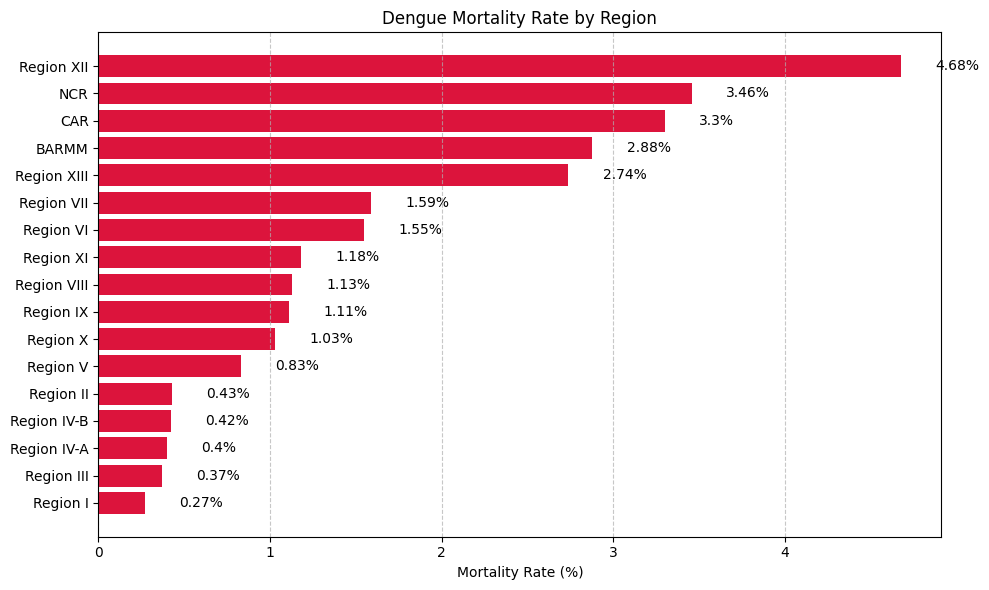

In [19]:

# Sort regions by mortality rate for better visual impact
Regional_Death_sorted = Regional_Death.sort_values(by='Mortality_Rate', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(Regional_Death_sorted['Region'], Regional_Death_sorted['Mortality_Rate'], color='crimson')
plt.xlabel('Mortality Rate (%)')
plt.title('Dengue Mortality Rate by Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optional: Add value labels
for index, value in enumerate(Regional_Death_sorted['Mortality_Rate']):
    plt.text(value + 0.2, index, f'{value}%', va='center')

plt.tight_layout()
plt.show()


<h3> Insight 11 </h3>
<p>Region XII has the highest dengue mortality rate at 4.68%, significantly higher than other regions. This suggests potential challenges in early detection, healthcare access, or case management, which may have contributed to more severe or fatal outcomes. </p>

<h3> Insight 12 </h3>
<p>The National Capital Region (3.46%), CAR (3.3%), and BARMM (2.88%) follow, showing relatively high death-to-case ratios despite differences in total dengue cases. These elevated mortality rates may reflect differences in healthcare infrastructure, reporting practices, or timely treatment availability. </p>

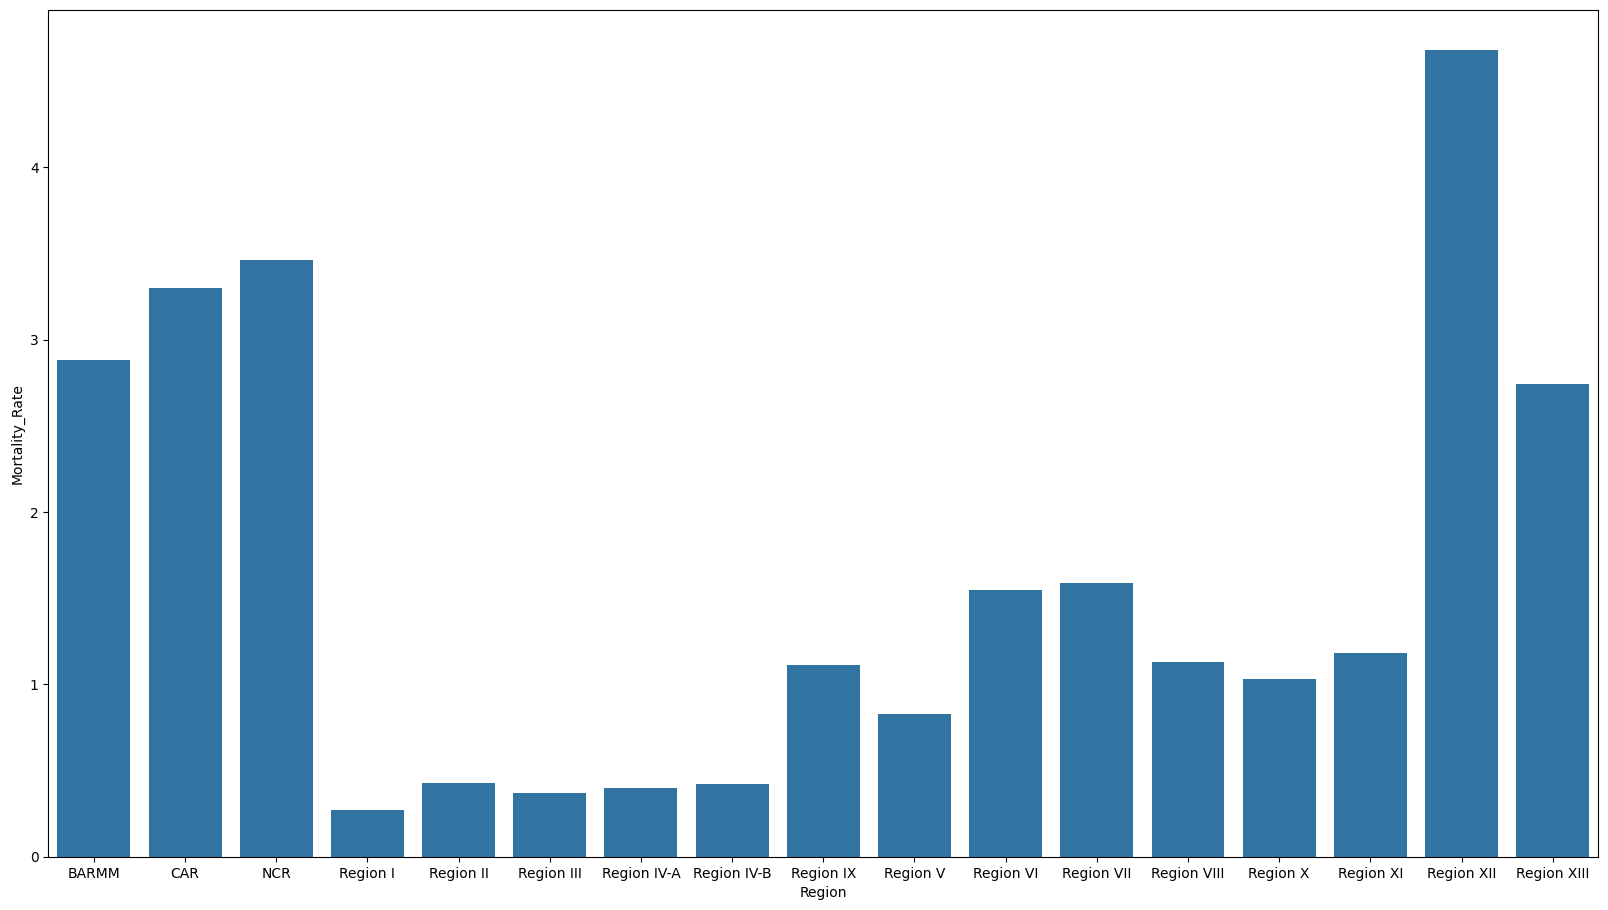

In [20]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

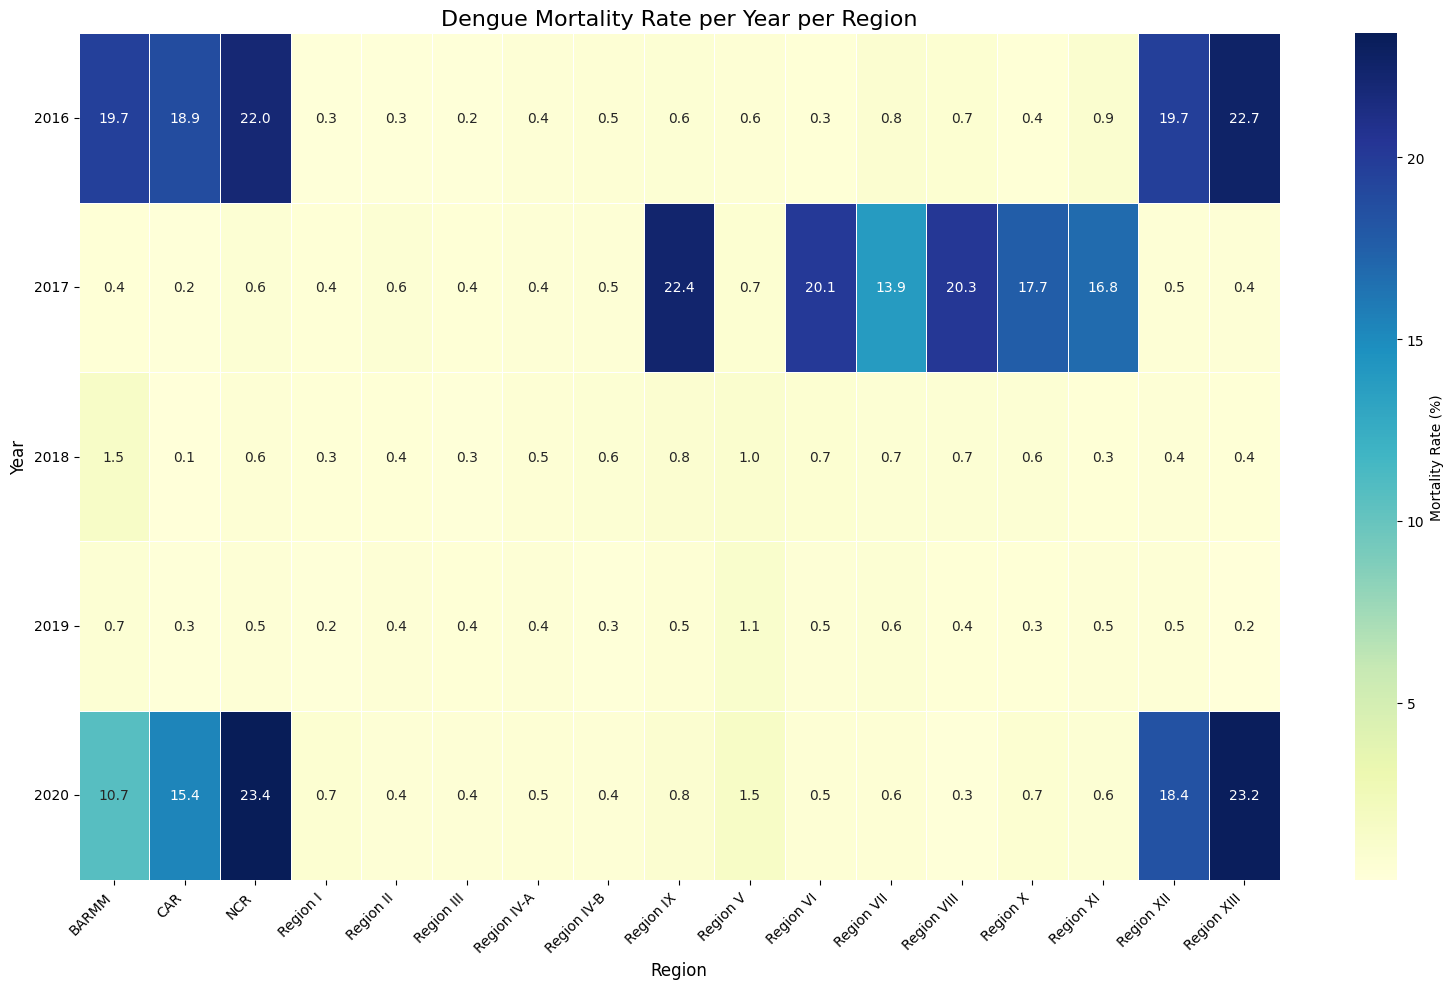

In [21]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVES </h1>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called df
# Convert Year to numeric if it's currently stored as datetime
# df['Year'] = df['Year'].dt.year

# Check the data types of your features
print(dengue.dtypes)

# Convert Dengue_Cases to numeric if it's not already
# df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])

dengue['Year'] = pd.to_numeric(dengue['Year'])
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'])
# Split the data into features (X) and target variable (y)
X = dengue['Year'].values.reshape(-1, 1)
y = dengue['Dengue_Cases'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make a prediction for a new year
new_year = 2025
new_cases = model.predict([[new_year]])
print("Predicted number of dengue cases in", new_year, ":", new_cases[0])


Month             category
Year                 int64
Region              object
Dengue_Cases         int64
Dengue_Deaths        int64
Mortality_Rate     float64
dtype: object
Mean Squared Error: 1805441.73572055
Predicted number of dengue cases in 2025 : 1280.286494492415


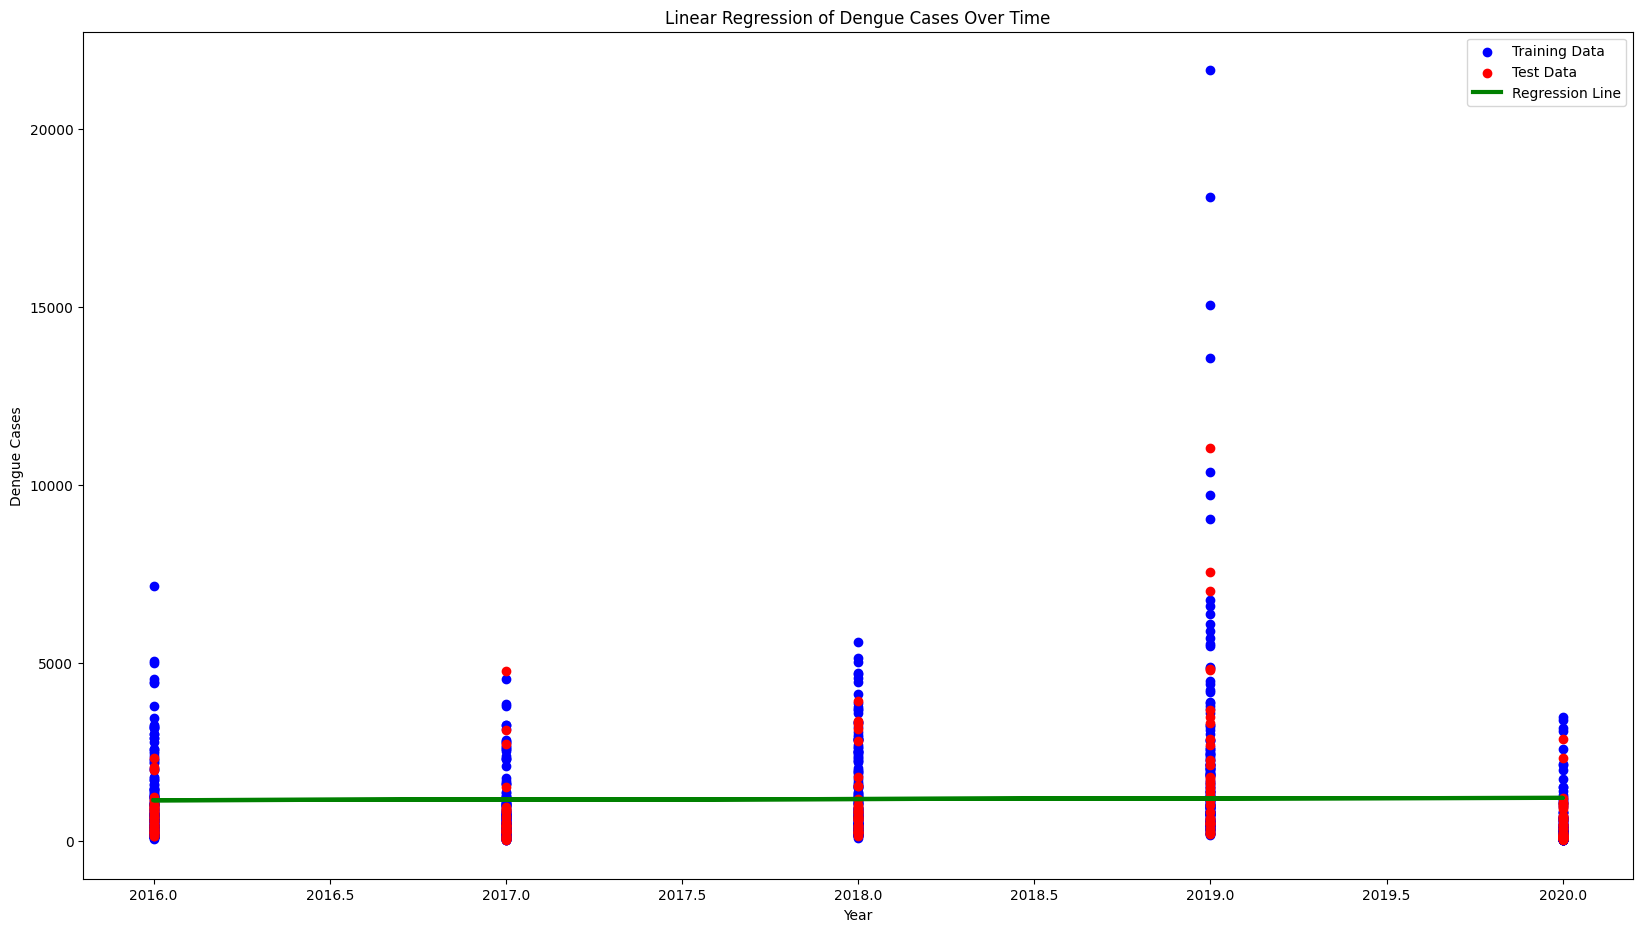

In [23]:

plt.scatter(X_train, y_train, color='blue', label='Training Data')


plt.scatter(X_test, y_test, color='red', label='Test Data')


plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')


plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Linear Regression of Dengue Cases Over Time')
plt.legend()

# Show plot
plt.gcf().set_size_inches(20,11)
plt.show()



<h3>Insight </h3>
<p>The dengue analysis shows that Regions IV-A, VI, and NCR have the highest number of cases, while Regions XII, NCR, and CAR record the highest mortality rates, reflecting regional differences in outbreak impact and healthcare response. Overall, dengue cases fluctuate yearly, with no clear upward or downward trend from 2016 to 2020, indicating that outbreaks are sporadic and largely driven by environmental and seasonal factors.</p>